#  Basics of hierarchical clustering


## Hierarchical clustering: ward method
It is time for Comic-Con! Comic-Con is an annual comic-based convention held in major cities in the world. You have the data of last year's footfall, the number of people at the convention ground at a given time. You would like to decide the location of your stall to maximize sales. Using the ward method, apply hierarchical clustering to find the two points of attraction in the area.

The data is stored in a Pandas data frame, comic_con. x_scaled and y_scaled are the column names of the standardized X and Y coordinates of people at a given point in time.

### init: 1 dataframe

In [1]:
from uploadfromdatacamp import saveFromFileIO

#uploadToFileIO(comic_con)
tobedownloaded="{pandas.core.frame.DataFrame: {'comic_con.csv': 'https://file.io/xQD7PB'}}"
prefix='data_from_datacamp/Chap2-Exercise1.1_'
#saveFromFileIO(tobedownloaded, prefix=prefix, proxy="10.225.92.1:80")

{pandas.core.frame.DataFrame: {"comic_con.csv": "https://file.io/xQD7PB"}}
{'pandas.core.frame.DataFrame': {'comic_con.csv': 'https://file.io/xQD7PB'}}
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  1645    0  1645    0     0   2339      0 --:--:-- --:--:-- --:--:--  2339


In [2]:
import pandas as pd
comic_con=pd.read_csv(prefix+'comic_con.csv',index_col=0)

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

### code

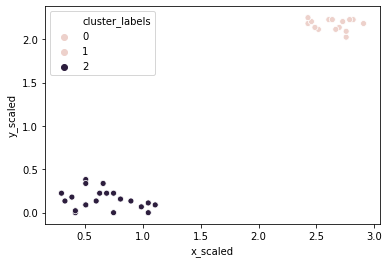

In [7]:
# Import the fcluster and linkage functions
from scipy.cluster.hierarchy import fcluster, linkage

# Use the linkage() function
distance_matrix = linkage(comic_con[['x_scaled', 'y_scaled']], method= 'ward', metric = 'euclidean')

# Assign cluster labels
comic_con['cluster_labels'] = fcluster(distance_matrix, 2, criterion='maxclust')

# Plot clusters
sns.scatterplot(x='x_scaled', y='y_scaled', 
                hue='cluster_labels', data = comic_con)
plt.show()

## Hierarchical clustering: single method
Let us use the same footfall dataset and check if any changes are seen if we use a different method for clustering.

The data is stored in a Pandas data frame, comic_con. x_scaled and y_scaled are the column names of the standardized X and Y coordinates of people at a given point in time.

### code

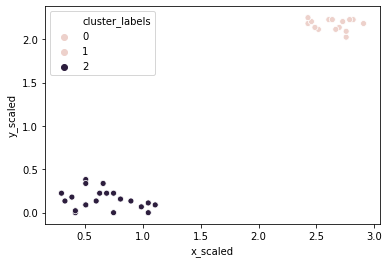

In [8]:
# Import the fcluster and linkage functions
from scipy.cluster.hierarchy import fcluster, linkage

# Use the linkage() function
distance_matrix = linkage(comic_con[['x_scaled', 'y_scaled']], method= 'single', metric = 'euclidean')

# Assign cluster labels
comic_con['cluster_labels'] = fcluster(distance_matrix, 2, criterion='maxclust')

# Plot clusters
sns.scatterplot(x='x_scaled', y='y_scaled', 
                hue='cluster_labels', data = comic_con)
plt.show()

## Hierarchical clustering: complete method
For the third and final time, let us use the same footfall dataset and check if any changes are seen if we use a different method for clustering.

The data is stored in a Pandas data frame, comic_con. x_scaled and y_scaled are the column names of the standardized X and Y coordinates of people at a given point in time.

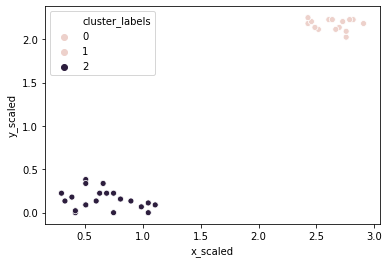

In [9]:
# Import the fcluster and linkage functions
from scipy.cluster.hierarchy import fcluster, linkage

# Use the linkage() function
distance_matrix = linkage(comic_con[['x_scaled', 'y_scaled']], method= 'complete', metric = 'euclidean')

# Assign cluster labels
comic_con['cluster_labels'] = fcluster(distance_matrix, 2, criterion='maxclust')

# Plot clusters
sns.scatterplot(x='x_scaled', y='y_scaled', 
                hue='cluster_labels', data = comic_con)
plt.show()

# Visualize clusters


## Visualize clusters with matplotlib
We have discussed that visualizations are necessary to assess the clusters that are formed and spot trends in your data. Let us now focus on visualizing the footfall dataset from Comic-Con using the matplotlib module.

The data is stored in a Pandas data frame, comic_con. x_scaled and y_scaled are the column names of the standardized X and Y coordinates of people at a given point in time. cluster_labels has the cluster labels. A linkage object is stored in the variable distance_matrix.

### code

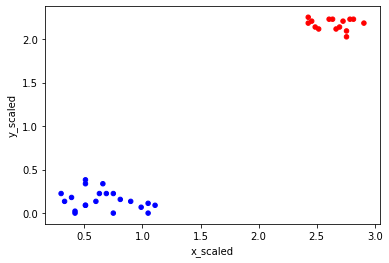

In [16]:
# Import the pyplot class
import matplotlib.pyplot as plt

# Define a colors dictionary for clusters
colors = {1:'red', 2:'blue'}

# Plot a scatter plot
comic_con.plot.scatter(x = 'x_scaled', 
                	   y = 'y_scaled',
                	   c = comic_con['cluster_labels'].apply(lambda x: colors[x]))
plt.show()

## Visualize clusters with seaborn
Let us now visualize the footfall dataset from Comic Con using the seaborn module. Visualizing clusters using seaborn is easier with the inbuild hue function for cluster labels.

The data is stored in a Pandas data frame, comic_con. x_scaled and y_scaled are the column names of the standardized X and Y coordinates of people at a given point in time. cluster_labels has the cluster labels. A linkage object is stored in the variable distance_matrix.

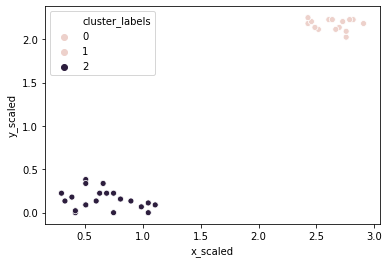

In [18]:
# Import the seaborn module
import seaborn as sns

# Plot a scatter plot using seaborn
sns.scatterplot(x='x_scaled', 
                y='y_scaled', 
                hue='cluster_labels', 
                data = comic_con)
plt.show()

# How many clusters?

## Create a dendrogram
Dendrograms are branching diagrams that show the merging of clusters as we move through the distance matrix. Let us use the Comic Con footfall data to create a dendrogram.

The data is stored in a Pandas data frame, comic_con. x_scaled and y_scaled are the column names of the standardized X and Y coordinates of people at a given point in time. cluster_labels has the cluster labels. A linkage object is stored in the variable distance_matrix.

In [21]:
distance_matrix=linkage(comic_con[['x_scaled', 'y_scaled']], method='ward', metric='euclidean')


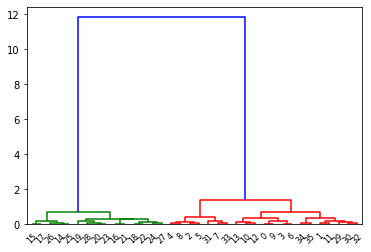

In [24]:
# Import the dendrogram function
from scipy.cluster.hierarchy import dendrogram

# Create a dendrogram
dn = dendrogram(distance_matrix)

# Display the dendogram
plt.show()

## How many clusters in comic con data?
Given the dendrogram from the last exercise, how many clusters can you see in the data?

A dendrogram is stored in the variable dn. Use plt.show() to display the dendrogram.

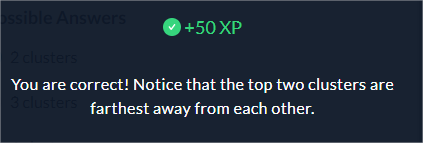

# Limitations of hierarchical clustering


In [25]:
from scipy.cluster.hierarchy import linkage
import pandas as pd
import random, timeit
points=100
df=pd.DataFrame({'x':random.sample(range(0,points), points), \
                'y': random.sample(range(0, points), points)})
%timeit linkage(df[['x', 'y']], method='ward', metric='euclidean')

909 µs ± 13.6 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


## Timing run of hierarchical clustering
In earlier exercises of this chapter, you have used the data of Comic-Con footfall to create clusters. In this exercise you will time how long it takes to run the algorithm on DataCamp's system.

Remember that you can time the execution of small code snippets with:

%timeit sum([1, 3, 2])
The data is stored in a Pandas data frame, comic_con. x_scaled and y_scaled are the column names of the standardized X and Y coordinates of people at a given point in time. The timeit module and linkage function are already imported

How long does it take to the run the linkage function on the comic con data?

In [26]:
%timeit linkage(comic_con[['x_scaled', 'y_scaled']], method='ward', metric='euclidean')

762 µs ± 25.6 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


## FIFA 18: exploring defenders
In the FIFA 18 dataset, various attributes of players are present. Two such attributes are:

sliding tackle: a number between 0-99 which signifies how accurate a player is able to perform sliding tackles
aggression: a number between 0-99 which signifies the commitment and will of a player
These are typically high in defense-minded players. In this exercise, you will perform clustering based on these attributes in the data.

This data consists of 5000 rows, and is considerably larger than earlier datasets. Running hierarchical clustering on this data can take up to 10 seconds.

The following modules are pre-loaded: dendrogram, linkage, fcluster from scipy.cluster.hierarchy, matplotlib.pyplot as plt, seaborn as sns. The data is stored in a Pandas dataframe, fifa.

### init: 1 dataframe, dendrogram, linkage, fcluster

In [27]:
from uploadfromdatacamp import saveFromFileIO

#uploadToFileIO(fifa)
tobedownloaded="{pandas.core.frame.DataFrame: {'fifa.csv': 'https://file.io/hLYEZP'}}"
prefix='data_from_datacamp/Chap2-Exercise4.2_'
#saveFromFileIO(tobedownloaded, prefix=prefix, proxy="10.225.92.1:80")

{pandas.core.frame.DataFrame: {"fifa.csv": "https://file.io/hLYEZP"}}
{'pandas.core.frame.DataFrame': {'fifa.csv': 'https://file.io/hLYEZP'}}
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  233k    0  233k    0     0   218k      0 --:--:--  0:00:01 --:--:--  218k


In [28]:
import pandas as pd
fifa=pd.read_csv(prefix+'fifa.csv',index_col=0)

In [29]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import  matplotlib.pyplot as plt
import seaborn as sns

### init

Fit the scaled data in columns scaled_sliding_tackle and scaled_aggression into a hierarchical clustering algorithm. Additionally, you may want to check how long it takes to run the data in the console using the timeit module.

In [30]:
# Fit the data into a hierarchical clustering algorithm
distance_matrix = linkage(fifa[['scaled_sliding_tackle', 'scaled_aggression']], 'ward')

Assign cluster labels to each row in the data using the fcluster() function (use 3 clusters).


In [31]:
# Assign cluster labels to each row of data
fifa['cluster_labels'] = fcluster(distance_matrix, 3, criterion='maxclust')

Display cluster centers of each cluster with respect to the scaled columns by calculating the mean value for each cluster.

In [32]:
# Display cluster centers of each cluster
print(fifa[['scaled_sliding_tackle', 'scaled_aggression', 'cluster_labels']].groupby('cluster_labels').mean())

                scaled_sliding_tackle  scaled_aggression
cluster_labels                                          
1                            2.918164           4.290068
2                            1.267917           3.906601
3                            0.858130           2.180922


Create a scatter plot using seaborn with the scaled sliding tackle attribute on the x-axis and the scaled aggression attribute on the y-axis. Assign a different color to each cluster.

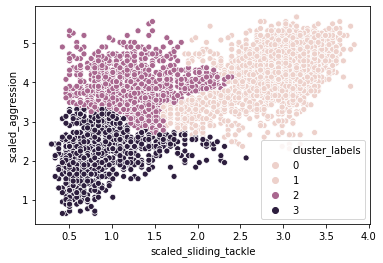

In [33]:
# Create a scatter plot through seaborn
sns.scatterplot(x='scaled_sliding_tackle', y='scaled_aggression', hue='cluster_labels', data=fifa)
plt.show()